# Importações Necessárias

In [180]:
import sys, os
import pandas as pd
import numpy as np

from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
pd.set_option('display.max_columns',210)
pd.set_option('display.max_rows',100)

In [3]:
data_path = './Dados/'
result_path = './Resultados/'

In [108]:
df_corpus = pd.read_pickle(os.path.join(data_path,'preprocessed_corpus.pkl'))

In [109]:
corpus = list(df_corpus['sample'])
label = list(df_corpus['label'])

In [110]:
df_corpus['len'] = df_corpus['sample'].apply(lambda x: len(x))

In [111]:
df_corpus.sort_values('len')[20:40]

,sample,label,len
328,coreia do norte lanca mais um missil balistico...,1,96
2557,artistas nordestinos ficam indignados com decl...,1,97
2940,emocionante jovem de 0 anos morre de cancer e ...,1,99
2486,quem mente lula ou o estadao como pode alguem ...,1,99
3576,sertanejo que vendeu 0 milhoes de discos passa...,1,100
3539,dezenas de africanos invadem a fronteira da es...,1,102
1665,atitude de lula confirma diagnostico de transt...,1,102
2821,russia entra na briga contra o estado islamico...,1,104
442,globo afasta otaviano costa por ASPAS machismo...,1,106
160,defesa de ASPAS deputado da mala ASPAS pede ao...,1,106


In [112]:
df_corpus['sample'][0]

'katia abreu diz que vai colocar sua expulsao em uma moldura mas nao para de reclamar a senadora katia abreu sem partidoto disse que sua expulsao do pmdb foi resultado de uma acao da cupula atual da legenda que segundo ela e oportunista ASPAS amanha eu vou botar numa moldura dourada a minha expulsao porque das maos de onde veio e um atestado de boa conduta para o meu curriculo essas pessoas que me expulsaram nao servem ao pais eles se servem do pais em seus beneficios proprios ASPAS disse katia abreu ue mas se a expulsao e algo tao bom para seu curriculo por que tanta choradeira katia sabemos o motivo provavelmente katia nao tem valor para o pt partido que ja deveria tela absorvido ao que parece o pt gostava de katia somente se ela ficasse entrincheirada dentro do pmdb ou seja isso e se rebaixar demais resta a katia ficar chorando as pitangas por todos os cantos em tempo ate o momento o pt nao cadastrou katia abreu em suas fileiras que situacao patetica para a exministra da agricultura

# Dependências

In [113]:
# Pacote de stop words em português
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# Pacote de stemmers em portguês
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

# Stemmer
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELOGROUP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\ELOGROUP\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [114]:
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [115]:
df_corpus['sample'][0]

'katia abreu diz que vai colocar sua expulsao em uma moldura mas nao para de reclamar a senadora katia abreu sem partidoto disse que sua expulsao do pmdb foi resultado de uma acao da cupula atual da legenda que segundo ela e oportunista ASPAS amanha eu vou botar numa moldura dourada a minha expulsao porque das maos de onde veio e um atestado de boa conduta para o meu curriculo essas pessoas que me expulsaram nao servem ao pais eles se servem do pais em seus beneficios proprios ASPAS disse katia abreu ue mas se a expulsao e algo tao bom para seu curriculo por que tanta choradeira katia sabemos o motivo provavelmente katia nao tem valor para o pt partido que ja deveria tela absorvido ao que parece o pt gostava de katia somente se ela ficasse entrincheirada dentro do pmdb ou seja isso e se rebaixar demais resta a katia ficar chorando as pitangas por todos os cantos em tempo ate o momento o pt nao cadastrou katia abreu em suas fileiras que situacao patetica para a exministra da agricultura

In [116]:
print(df_corpus['sample'][0].split())

['katia', 'abreu', 'diz', 'que', 'vai', 'colocar', 'sua', 'expulsao', 'em', 'uma', 'moldura', 'mas', 'nao', 'para', 'de', 'reclamar', 'a', 'senadora', 'katia', 'abreu', 'sem', 'partidoto', 'disse', 'que', 'sua', 'expulsao', 'do', 'pmdb', 'foi', 'resultado', 'de', 'uma', 'acao', 'da', 'cupula', 'atual', 'da', 'legenda', 'que', 'segundo', 'ela', 'e', 'oportunista', 'ASPAS', 'amanha', 'eu', 'vou', 'botar', 'numa', 'moldura', 'dourada', 'a', 'minha', 'expulsao', 'porque', 'das', 'maos', 'de', 'onde', 'veio', 'e', 'um', 'atestado', 'de', 'boa', 'conduta', 'para', 'o', 'meu', 'curriculo', 'essas', 'pessoas', 'que', 'me', 'expulsaram', 'nao', 'servem', 'ao', 'pais', 'eles', 'se', 'servem', 'do', 'pais', 'em', 'seus', 'beneficios', 'proprios', 'ASPAS', 'disse', 'katia', 'abreu', 'ue', 'mas', 'se', 'a', 'expulsao', 'e', 'algo', 'tao', 'bom', 'para', 'seu', 'curriculo', 'por', 'que', 'tanta', 'choradeira', 'katia', 'sabemos', 'o', 'motivo', 'provavelmente', 'katia', 'nao', 'tem', 'valor', 'para'

In [117]:
st = []
for w in df_corpus['sample'][0].split():
    st.append(stemmer.stem(w))
    
print(st)

['kat', 'abr', 'diz', 'que', 'vai', 'coloc', 'sua', 'expulsa', 'em', 'uma', 'mold', 'mas', 'nao', 'par', 'de', 'reclam', 'a', 'sen', 'kat', 'abr', 'sem', 'partidot', 'diss', 'que', 'sua', 'expulsa', 'do', 'pmdb', 'foi', 'result', 'de', 'uma', 'aca', 'da', 'cupul', 'atual', 'da', 'legend', 'que', 'segund', 'ela', 'e', 'oportun', 'asp', 'amanh', 'eu', 'vou', 'bot', 'num', 'mold', 'dour', 'a', 'minh', 'expulsa', 'porqu', 'da', 'mao', 'de', 'ond', 'vei', 'e', 'um', 'atest', 'de', 'boa', 'condut', 'par', 'o', 'meu', 'curricul', 'ess', 'pesso', 'que', 'me', 'expuls', 'nao', 'serv', 'ao', 'pal', 'ele', 'se', 'serv', 'do', 'pal', 'em', 'seu', 'benefici', 'propri', 'asp', 'diss', 'kat', 'abr', 'ue', 'mas', 'se', 'a', 'expulsa', 'e', 'alg', 'tao', 'bom', 'par', 'seu', 'curricul', 'por', 'que', 'tant', 'chor', 'kat', 'sab', 'o', 'motiv', 'prova', 'kat', 'nao', 'tem', 'val', 'par', 'o', 'pt', 'part', 'que', 'ja', 'dev', 'tel', 'absorv', 'ao', 'que', 'parec', 'o', 'pt', 'gost', 'de', 'kat', 'soment

In [118]:
stemmer.stem('colocar')

'coloc'

# Separação dos dados

Os dados serão separados segundo os seguintes critérios:
* 20% conjunto de teste (1440 amostras)
* 80% conjunto de treinamento (5760 amostras)
    * 1/3 conjunto de validação (1920 amostras)
    * 2/3 conjunto de treino de algoritmo (3840 amostras)

Obs: a subdivisão do conjunto de treinamento é feita dentro do GridSearch

In [119]:
X_train, X_test, y_train, y_test = train_test_split(corpus, label, test_size=0.2, random_state=1)

# Bag of Words

In [120]:
Tfid = []

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = None))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = stopwords,
                            max_features = None))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = stemmed_words,
                            stop_words = stopwords,
                            max_features = None))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = 200))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = stopwords,
                            max_features = 200))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = stemmed_words,
                            stop_words = stopwords,
                            max_features = 200))

transform_name = ['Bow','Bow_stopwords','Bow_stopwords_stemming','trunc_Bow','trunc_Bow_stopwords','trunc_Bow_stopwords_stemming']

# SVM

In [121]:
# Set the parameters by cross-validation
param_grid1 = [{'SVM__kernel': ['linear'],
                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4]},

               {'SVM__kernel': ['rbf'], 
                'SVM__gamma' : [1e0, 1e-1, 1e-2, 1e-3], 
                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4]},

               {'SVM__kernel': ['poly'], 
                'SVM__gamma' : [1e0, 1e-1, 1e-2, 1e-3], 
                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4],
                'SVM__degree': [2, 3, 4],
                'SVM__coef0' : [0, 1e1, 1e2]}]

# Set the parameters by cross-validation
param_grid2 = [{'SVM__kernel': ['linear'],
                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4]},

               {'SVM__kernel': ['rbf'], 
                'SVM__gamma' : [1e0, 1e-1, 1e-2, 1e-3], 
                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4]},

               {'SVM__kernel': ['poly'], 
                'SVM__gamma' : [1e0, 1e-1, 1e-2, 1e-3], 
                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4],
                'SVM__degree': [2, 3, 4],
                'SVM__coef0' : [0, 1e1, 1e2]}]

# {'SVM__kernel': ['poly'], 
#                'SVM__gamma' : [1e0, 1e-1, 1e-2, 1e-3], 
#                'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4],
#                'SVM__degree': [5, 6],
#                'SVM__coef0' : [0, 1e1, 1e2]}


# Métricas

In [122]:
scoring = ['accuracy','f1','precision','recall']

# Exemplo

In [123]:
Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = None))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = stopwords,
                            max_features = None))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = stemmed_words,
                            stop_words = stopwords,
                            max_features = None))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = 200))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = stopwords,
                            max_features = 200))

Tfid.append(TfidfVectorizer(lowercase  = False,
                            analyzer   = stemmed_words,
                            stop_words = stopwords,
                            max_features = 200))

In [124]:
vectorizer1 = TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = None)

vectorizer2 = TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = stopwords,
                            max_features = None)

vectorizer3 = TfidfVectorizer(lowercase  = False,
                            analyzer   = stemmed_words,
                            stop_words = stopwords,
                            max_features = None)

vectorizer4 = TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = 200)

vectorizer5 = TfidfVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = stopwords,
                            max_features = 200)

vectorizer6 = TfidfVectorizer(lowercase  = False,
                            analyzer   = stemmed_words,
                            stop_words = stopwords,
                            max_features = 200)

In [125]:
X1 = vectorizer1.fit_transform(X_train)
X1.shape

(5760, 78672)

In [126]:
print(vectorizer1.get_feature_names()[0:25])

['ASPAS', 'EUR', 'PS', 'PS0', 'REDESOCIAL', 'SS', 'SS0', 'URL', 'a0', 'aa', 'aabb', 'aabertura', 'aachen', 'aapesar', 'aarhus', 'aaron', 'aashish', 'ab', 'abacaxi', 'abadia', 'abaete', 'abafa', 'abafada', 'abafadas', 'abafado']


In [127]:
X2 = vectorizer2.fit_transform(X_train)
X2.shape

(5760, 78516)

In [128]:
print(vectorizer2.get_feature_names()[0:25])

['ASPAS', 'EUR', 'PS', 'PS0', 'REDESOCIAL', 'SS', 'SS0', 'URL', 'a0', 'aa', 'aabb', 'aabertura', 'aachen', 'aapesar', 'aarhus', 'aaron', 'aashish', 'ab', 'abacaxi', 'abadia', 'abaete', 'abafa', 'abafada', 'abafadas', 'abafado']


In [129]:
X3 = vectorizer3.fit_transform(X_train)
X3.shape

(5760, 38432)

In [130]:
print(vectorizer3.get_feature_names()[0:25])

['a0', 'aa', 'aabb', 'aabert', 'aachen', 'aapes', 'aarhu', 'aaron', 'aashish', 'ab', 'aba', 'abacax', 'abad', 'abaet', 'abaf', 'abag', 'abair', 'abaix', 'abaixoassin', 'abajur', 'abal', 'abaladiss', 'abalarams', 'abalro', 'aban']


In [131]:
X4 = vectorizer4.fit_transform(X_train)
X4.shape

(5760, 200)

In [132]:
print(vectorizer4.get_feature_names()[0:25])

['ASPAS', 'acao', 'acordo', 'afirma', 'afirmou', 'agora', 'ainda', 'alem', 'ano', 'anos', 'antes', 'ao', 'aos', 'apenas', 'apos', 'as', 'assim', 'ate', 'bem', 'brasil', 'camara', 'casa', 'caso', 'com', 'como']


In [133]:
X5 = vectorizer5.fit_transform(X_train)
X5.shape

(5760, 200)

In [134]:
print(vectorizer5.get_feature_names()[0:25])

['ASPAS', 'acao', 'acordo', 'advogado', 'aecio', 'afirma', 'afirmou', 'agora', 'ainda', 'alem', 'alguns', 'ano', 'anos', 'antes', 'apenas', 'apos', 'aqui', 'assim', 'ate', 'bem', 'brasil', 'cada', 'camara', 'campanha', 'casa']


In [135]:
X6 = vectorizer6.fit_transform(X_train)
X6.shape

(5760, 200)

In [136]:
print(vectorizer6.get_feature_names()[0:25])

['acontec', 'acord', 'advog', 'afirm', 'agor', 'aind', 'alem', 'algum', 'ano', 'ant', 'ao', 'apen', 'apo', 'apresent', 'as', 'asp', 'ate', 'bem', 'brasil', 'cam', 'campanh', 'cas', 'cham', 'cheg', 'cidad']


In [139]:
vectorizer1.vocabulary_

{'cunha': 19861,
 'chora': 14257,
 'renuncia': 64464,
 'ao': 4814,
 'cargo': 12563,
 'chama': 13798,
 'deputados': 21712,
 'de': 20428,
 'acefalos': 680,
 'eduardo': 26336,
 'anunciou': 4805,
 'sua': 70621,
 'presidencia': 59439,
 'da': 20114,
 'camara': 11820,
 'em': 26877,
 'coletiva': 15429,
 'nesta': 52026,
 'quintafeira': 61888,
 'ASPAS': 0,
 'publico': 61240,
 'notorio': 52599,
 'que': 61652,
 'casa': 12851,
 'esta': 30072,
 'acefala': 679,
 'somente': 70038,
 'minha': 49673,
 'podera': 57811,
 'por': 58200,
 'fim': 33698,
 'essa': 30052,
 'instabilidade': 41510,
 'sem': 68207,
 'prazo': 58817,
 'disse': 24919,
 'deputado': 21708,
 'afastado': 1889,
 'chorou': 14280,
 'ler': 45390,
 'seu': 68750,
 'depoimento': 21611,
 'aos': 4820,
 'jornalistas': 43648,
 'posicionados': 58401,
 'no': 52306,
 'salao': 67151,
 'verde': 76462,
 'nao': 51434,
 'citou': 14724,
 'as': 6499,
 'propinas': 60549,
 'contas': 17840,
 'secretas': 67930,
 'na': 51300,
 'suica': 71109,
 'paga': 54505,
 'um': 

In [148]:
vectorized = vectorizer1.transform(X_train)
vectorized.toarray()

array([[0.14962982, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07608932, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13443614, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [149]:
df = pd.DataFrame(vectorized.toarray(),columns=vectorizer1.vocabulary_)
df

,cunha,chora,renuncia,ao,cargo,chama,deputados,de,acefalos,eduardo,anunciou,sua,presidencia,da,camara,em,coletiva,nesta,quintafeira,ASPAS,publico,notorio,que,casa,esta,acefala,somente,minha,podera,por,fim,essa,instabilidade,sem,prazo,disse,deputado,afastado,chorou,ler,seu,depoimento,aos,jornalistas,posicionados,no,salao,verde,nao,citou,as,propinas,contas,secretas,na,suica,paga,um,preco,alto,ter,dado,inicio,processo,impeachment,contra,presidente,dilma,rousseff,indicando,retaliacao,cassacao,corre,tambem,denunciou,referencia,procuradoria,geral,republica,seletividade,do,orgao,acusador,abaixo,trecho,carta,temer,revela,camuflada,ideologia,comunista,michel,decidiu,revelar,afinidade,com,vai,dar,verdadeiro,golpe,expectativa,quem,apoiou,voce,ficara,...,hilda,hilst,santissima,arnaud,esquecera,islamita,superu,usadon,gendarmerie,nationale,cyr,gsign,military,valour,nicolic,salafismo,carcassona,energizacao,analisador,smp,mdpmg,indisposicao,pipocos,tolir,morin,leonir,edezio,apaixonaram,caprichar,dayane,mylena,radiotelescopio,klem,cresceria,descontraidas,midas,traquinos,maga,hiodrocefalia,thedim,mariinha,lpm,pluft,fantasminha,boscoli,bronzeada,meteorico,reservadissimo,galenteio,barrault,estipulasse,estrearam,pongetti,zampari,afiando,michalski,despojarse,reputava,quartett,arriscase,coreografada,luce,wotzik,chekhov,despoja,professoria,palomera,isay,weinfeld,bodansky,definila,lamentava,ahhho,disputaria,carteirada,abestado,afogando,golpealo,pavimentadas,abortados,saldaria,desmorone,aerostar,devolviam,bege,denunciasse,cutvox,desaconselhados,manipulalos,ostensivamente,estacione,utlilizar,alcas,doleiras,pochetes,adulterarem,distinguirem,malintencionado,ajdua,ermos,frisaram,melzinho,puxarem,pincano,pivetes
0,0.149630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.076089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [151]:
df_sum = df.sum().reset_index(name='sum')


In [154]:
df_sum = df_sum.sort_values('sum',ascending=False)

In [156]:
df_sum['cumsum'] = df_sum['sum'].cumsum()
df_sum

,index,sum,cumsum
20428,descentralizada,1068.710163,1068.710163
61652,sonificacao,668.752405,1737.462568
0,cunha,595.840191,2333.302759
25347,comira,499.113277,2832.416036
20114,pegaram,446.462062,3278.878098
...,...,...,...
45029,peras,0.008472,67289.694723
36003,vibrou,0.008472,67289.703195
41820,capitinga,0.008472,67289.711667
5839,espantosamente,0.008472,67289.720139


In [157]:
df_sum['pct_cumsum'] = df_sum['cumsum']/df_sum['sum'].sum()

In [160]:
df_sum[df_sum['index']=='ASPAS']

,index,sum,cumsum,pct_cumsum
19,ASPAS,0.286348,62330.656896,0.926303


In [159]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [146]:
df.unstack().reset_index(name='tf_idf')

,level_0,level_1,tf_idf
0,cunha,0,19861
1,chora,0,14257
2,renuncia,0,64464
3,ao,0,4814
4,cargo,0,12563
...,...,...,...
78667,frisaram,0,34975
78668,melzinho,0,48842
78669,puxarem,0,61471
78670,pincano,0,57249


In [162]:
X_vec = new_vectorizer.fit_transform(X_train)
X_vec.shape

(5760, 78672)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
document_term_matrix = vectorizer.fit_transform(train_set)

In [168]:
new_vectorizer = CountVectorizer(lowercase  = False,
                            analyzer   = 'word',
                            stop_words = None,
                            max_features = None)

document_term_matrix = new_vectorizer.fit_transform(X_train)

vec = pd.DataFrame(document_term_matrix.toarray(),columns=new_vectorizer.vocabulary_)

vec_sum = vec.sum().reset_index(name='sum')
vec_sum = vec_sum.sort_values('sum',ascending=False)
vec_sum['cumsum'] = vec_sum['sum'].cumsum()
vec_sum['pct_cumsum'] = vec_sum['cumsum']/vec_sum['sum'].sum()

In [173]:
vec_sum

,index,sum,cumsum,pct_cumsum
20428,descentralizada,174127,174127,0.052280
61652,sonificacao,106546,280673,0.084269
0,cunha,74098,354771,0.106517
25347,comira,73763,428534,0.128663
20114,pegaram,65950,494484,0.148464
...,...,...,...,...
47035,jacomelis,1,3330661,0.999999
47039,inconclusivos,1,3330662,0.999999
12211,plantonista,1,3330663,0.999999
12210,capel,1,3330664,1.000000


In [170]:
ex = vec_sum[:200]

In [172]:
ex['pct_cumsum'].sum()

78.92859864321389

In [185]:
aux = vec_sum.iloc[:200,:].copy()

fig = px.histogram(x=aux['index'], y=aux['pct_cumsum'], nbins = 100)

fig.update_layout(title='Relevância cumulativa dos tokens',
                  xaxis_title='tokens',
                  yaxis_title='porcentagem cumulativa da frequência dos tokens')

fig.show()

In [190]:
aux['pct_cumsum'].iloc[199]

0.48627526334831034

In [166]:
document_term_matrix.toarray()

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [16,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [34,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [167]:
new_vectorizer.vocabulary_

{'cunha': 19861,
 'chora': 14257,
 'renuncia': 64464,
 'ao': 4814,
 'cargo': 12563,
 'chama': 13798,
 'deputados': 21712,
 'de': 20428,
 'acefalos': 680,
 'eduardo': 26336,
 'anunciou': 4805,
 'sua': 70621,
 'presidencia': 59439,
 'da': 20114,
 'camara': 11820,
 'em': 26877,
 'coletiva': 15429,
 'nesta': 52026,
 'quintafeira': 61888,
 'ASPAS': 0,
 'publico': 61240,
 'notorio': 52599,
 'que': 61652,
 'casa': 12851,
 'esta': 30072,
 'acefala': 679,
 'somente': 70038,
 'minha': 49673,
 'podera': 57811,
 'por': 58200,
 'fim': 33698,
 'essa': 30052,
 'instabilidade': 41510,
 'sem': 68207,
 'prazo': 58817,
 'disse': 24919,
 'deputado': 21708,
 'afastado': 1889,
 'chorou': 14280,
 'ler': 45390,
 'seu': 68750,
 'depoimento': 21611,
 'aos': 4820,
 'jornalistas': 43648,
 'posicionados': 58401,
 'no': 52306,
 'salao': 67151,
 'verde': 76462,
 'nao': 51434,
 'citou': 14724,
 'as': 6499,
 'propinas': 60549,
 'contas': 17840,
 'secretas': 67930,
 'na': 51300,
 'suica': 71109,
 'paga': 54505,
 'um': 

# Treinamento

Treinamento utilizando o bag of words completo

Fitting 3 folds for each of 246 candidates, totalling 738 fits

In [191]:
for i in range(0,3):
    
    print('\n***************************\n')
    print(f'Treinando modelo {i}...\n')
    
    steps = [(transform_name[i], Tfid[i]), ('SVM', SVC())]
    pipeline = Pipeline(steps)

    grid = GridSearchCV(pipeline, param_grid=param_grid1, cv=3, scoring=scoring, refit='f1', verbose=2)
    grid.fit(X_train, y_train)

    print(f'\nModelo {i} treinado!\n')

    print('Melhor estimador:\n')
    print(grid.best_estimator_)

    print('Salvando resultados... ', end='')

    grid_results = pd.DataFrame.from_dict(grid.cv_results_)
    grid_results.to_pickle(f'./Resultados/grid_{i}_results.pkl')

    print('OK \n')


***************************

Treinando modelo 0...

Fitting 3 folds for each of 246 candidates, totalling 738 fits


KeyboardInterrupt: 

Treinamento utilizando o bag of words truncado

Fitting 3 folds for each of 246 candidates, totalling 738 fits

In [192]:
for i in range(3,6):
    
    print('\n***************************\n')
    print(f'Treinando modelo {i}...\n')
    
    steps = [(transform_name[i], Tfid[i]), ('SVM', SVC())]
    pipeline = Pipeline(steps)

    grid = GridSearchCV(pipeline, param_grid=param_grid2, cv=3, scoring=scoring, refit='f1', verbose=2)
    grid.fit(X_train, y_train)

    print(f'\nModelo {i} treinado!\n')

    print('Melhor estimador:\n')
    print(grid.best_estimator_)

    print('Salvando resultados... ', end='')

    grid_results = pd.DataFrame.from_dict(grid.cv_results_)
    grid_results.to_pickle(f'./Resultados/grid_{i}_results.pkl')

    print('OK \n')


***************************

Treinando modelo 3...

Fitting 3 folds for each of 246 candidates, totalling 738 fits
[CV] END .....................SVM__C=0.2, SVM__kernel=linear; total time=   8.3s


KeyboardInterrupt: 

In [193]:
param_grid3 = {'SVM__kernel': ['poly'], 
               'SVM__gamma' : [1e0, 1e-1, 1e-2, 1e-3], 
               'SVM__C'     : [2e-1, 2e0, 2e1, 2e2, 2e3, 2e4],
               'SVM__degree': [5, 6],
               'SVM__coef0' : [0, 1e1, 1e2]}

Tfid3 = Tfid[0] #BoW
transform_name3 = transform_name[0] #BoW

Fitting 3 folds for each of 144 candidates, totalling 432 fits

In [194]:
i = 6
    
print('\n***************************\n')
print(f'Treinando modelo {i}...\n')

steps = [(transform_name3, Tfid3), ('SVM', SVC())]
pipeline = Pipeline(steps)

grid = GridSearchCV(pipeline, param_grid=param_grid3, cv=3, scoring=scoring, refit='f1', verbose=2)
grid.fit(X_train, y_train)

print(f'\nModelo {i} treinado!\n')

print('Melhor estimador:\n')
print(grid.best_estimator_)

print('Salvando resultados... ', end='')

grid_results = pd.DataFrame.from_dict(grid.cv_results_)
grid_results.to_pickle(f'./Resultados/grid_{i}_results.pkl')

print('OK \n')


***************************

Treinando modelo 6...

Fitting 3 folds for each of 144 candidates, totalling 432 fits


KeyboardInterrupt: 

## Resultados

In [114]:
def format_params(x):
    
    p_array = ['SVM__kernel','SVM__C','SVM__gamma','SVM__coef0','SVM__degree']

    s = []
    for i in range(0,len(x)):
        s.append(p_array[i][5:] + '=' + str(x[p_array[i]]))
    
    return ','.join(s)

In [159]:
grid_0 = pd.read_pickle(os.path.join(result_path,'grid_0_results.pkl'))
grid_0.insert(7,'transform',transform_name[0])

grid_1 = pd.read_pickle(os.path.join(result_path,'grid_1_results.pkl'))
grid_1.insert(7,'transform',transform_name[1])

grid_2 = pd.read_pickle(os.path.join(result_path,'grid_2_results.pkl'))
grid_2.insert(7,'transform',transform_name[2])

grid_3 = pd.read_pickle(os.path.join(result_path,'grid_3_results.pkl'))
grid_3.insert(7,'transform',transform_name[3])

grid_4 = pd.read_pickle(os.path.join(result_path,'grid_4_results.pkl'))
grid_4.insert(7,'transform',transform_name[4])

grid_5 = pd.read_pickle(os.path.join(result_path,'grid_5_results.pkl'))
grid_5.insert(7,'transform',transform_name[5])

grid_6 = pd.read_pickle(os.path.join(result_path,'grid_6_results.pkl'))
grid_6.insert(7,'transform',transform_name[0])

results = pd.concat([grid_0,grid_1,grid_2,grid_3,grid_4,grid_5,grid_6])

In [160]:
len(results)

1620

In [161]:
results['params_str'] = results['params'].apply(lambda x: format_params(x))

In [164]:
idx = results.groupby('transform')['rank_test_f1'].transform(min) == results['rank_test_f1']
results[idx][['transform','param_SVM__kernel', 'param_SVM__C','param_SVM__gamma','param_SVM__coef0','param_SVM__degree','mean_test_f1','mean_test_precision','mean_test_recall','mean_test_accuracy']].sort_values('mean_test_f1',ascending=False)

,transform,param_SVM__kernel,param_SVM__C,param_SVM__gamma,param_SVM__coef0,param_SVM__degree,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_accuracy
48,Bow_stopwords,poly,0.2,0.01,10,3,0.964879,0.959944,0.969886,0.964583
85,Bow_stopwords,poly,2,0.001,10,3,0.964879,0.959944,0.969886,0.964583
128,Bow,poly,20000,1,10,5,0.963298,0.963634,0.962963,0.963194
104,Bow,poly,2000,1,10,5,0.963298,0.963634,0.962963,0.963194
80,Bow,poly,200,1,10,5,0.963298,0.963634,0.962963,0.963194
56,Bow,poly,20,1,10,5,0.963298,0.963634,0.962963,0.963194
32,Bow,poly,2,1,10,5,0.963298,0.963634,0.962963,0.963194
8,Bow,poly,0.2,1,10,5,0.963298,0.963634,0.962963,0.963194
86,Bow,poly,2,1,10,4,0.962386,0.963891,0.960886,0.962326
50,Bow,poly,0.2,1,10,4,0.962386,0.963891,0.960886,0.962326


# Treinamento Melhor Modelo

In [13]:
Tfid_chosen = TfidfVectorizer(lowercase  = False,
                              analyzer   = 'word',
                              stop_words = stopwords,
                              max_features = None)

model_chosen = SVC(kernel='poly',
                   C=1e-1,
                   gamma=1e-2,
                   degree=3,
                   coef0=1e1)

In [15]:
steps = [('Bow_stopwords', Tfid_chosen), ('SVM_poly', model_chosen)]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Bow_stopwords',
                 TfidfVectorizer(lowercase=False,
                                 stop_words=['de', 'a', 'o', 'que', 'e', 'é',
                                             'do', 'da', 'em', 'um', 'para',
                                             'com', 'não', 'uma', 'os', 'no',
                                             'se', 'na', 'por', 'mais', 'as',
                                             'dos', 'como', 'mas', 'ao', 'ele',
                                             'das', 'à', 'seu', 'sua', ...])),
                ('SVM_poly',
                 SVC(C=0.1, coef0=10.0, gamma=0.01, kernel='poly'))])

In [16]:
y_pred = pipeline.predict(X_test)

In [17]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [19]:
confusion_matrix(y_test, y_pred)

array([[687,  42],
       [ 21, 690]], dtype=int64)

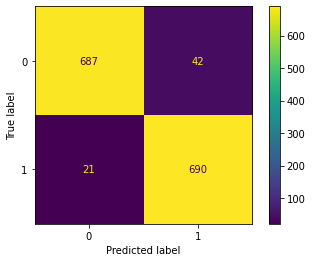

In [22]:
plot_confusion_matrix(pipeline, X_test, y_test) 

In [33]:
LBR = 42/(687+42)       # proporção de noticias verdadeiras classificadas como falsas (falsos positivos)
print(f'\nLBR = {LBR}')

FCR = 690/(690+42)      # proporção de notícias falsas classificadas como falsas (recall)
print(f'\nFCR = {FCR}')

FPR = 690/(690+21)      # proporção de notícias falsas...
print(f'\nFPR = {FPR}')


LBR = 0.05761316872427984

FCR = 0.9426229508196722

FPR = 0.9704641350210971


In [43]:
print('\nacurácia= (tp + tn) / (tp + tn + fp + fn)')
print('\nacurácia = {}\n'.format(accuracy_score(y_test, y_pred)))


acurácia= (tp + tn) / (tp + tn + fp + fn)

acurácia = 0.95625



In [42]:
print('\nprecisão(p) = tp / (tp + fp)')
print('\nprecisão(p) = {}\n'.format(precision_score(y_test, y_pred, average=None)[0]))

print('\nprecisão(n) = tn / (tn + fn)')
print('\nprecisão(n) = {}\n'.format(precision_score(y_test, y_pred, average=None)[1]))


precisão(p) = tp / (tp + fp)

precisão(p) = 0.9703389830508474


precisão(n) = tn / (tn + fn)

precisão(n) = 0.9426229508196722



In [44]:
print('\nF1-score = 2 * (precisão * recall) / (precisão + recall)')
print('\nF1-score = {}\n'.format(f1_score(y_test, y_pred, average=None)))


F1-score = 2 * (precisão * recall) / (precisão + recall)

F1-score = [0.95615866 0.95634096]



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.93')

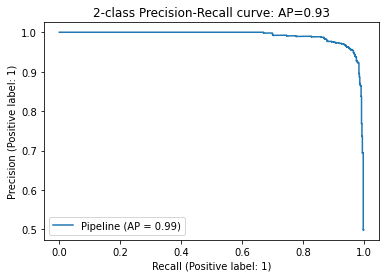

In [32]:
average_precision = average_precision_score(y_test, y_pred)

fig = plot_precision_recall_curve(pipeline, X_test, y_test)
fig.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))